In [2]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

#%matplotlib inline
password = getpass.getpass()
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

········


In [3]:
query = '''SELECT a.title, a.length, a.rating, e.name, c.rental_date
FROM film a 
JOIN film_category d
on a.film_id = d.film_id
Join category e
on d.category_id = e.category_id
JOIN inventory b 
ON a.film_id = b.film_id 
JOIN rental c 
ON b.inventory_id = c.inventory_id;'''

data = pd.read_sql_query(query, engine)
data.head()

,title,length,rating,name,rental_date
0,AMADEUS HOLY,113,PG,Action,2005-08-02 01:16:59
1,AMADEUS HOLY,113,PG,Action,2005-08-18 04:26:54
2,AMADEUS HOLY,113,PG,Action,2005-06-20 20:35:28
3,AMADEUS HOLY,113,PG,Action,2005-07-09 05:01:58
4,AMADEUS HOLY,113,PG,Action,2005-07-30 08:02:39


In [4]:
data

,title,length,rating,name,rental_date
0,AMADEUS HOLY,113,PG,Action,2005-08-02 01:16:59
1,AMADEUS HOLY,113,PG,Action,2005-08-18 04:26:54
2,AMADEUS HOLY,113,PG,Action,2005-06-20 20:35:28
3,AMADEUS HOLY,113,PG,Action,2005-07-09 05:01:58
4,AMADEUS HOLY,113,PG,Action,2005-07-30 08:02:39
...,...,...,...,...,...
16039,WORKING MICROCOSMOS,74,R,Travel,2005-05-30 18:45:17
16040,WORKING MICROCOSMOS,74,R,Travel,2005-06-15 09:03:52
16041,WORKING MICROCOSMOS,74,R,Travel,2005-07-07 06:38:31
16042,WORKING MICROCOSMOS,74,R,Travel,2005-07-30 00:12:41


### Data Cleaning

In [5]:
data.shape

(16044, 5)

In [6]:
data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        title  length  rating   name  rental_date
0      False   False   False  False        False
1      False   False   False  False        False
2      False   False   False  False        False
3      False   False   False  False        False
4      False   False   False  False        False
...      ...     ...     ...    ...          ...
16039  False   False   False  False        False
16040  False   False   False  False        False
16041  False   False   False  False        False
16042  False   False   False  False        False
16043  False   False   False  False        False

[16044 rows x 5 columns]>

In [7]:
data['rental_date'] = data['rental_date'].astype(str)

In [8]:
data["rental_date"] = data["rental_date"].str[:10]
data

,title,length,rating,name,rental_date
0,AMADEUS HOLY,113,PG,Action,2005-08-02
1,AMADEUS HOLY,113,PG,Action,2005-08-18
2,AMADEUS HOLY,113,PG,Action,2005-06-20
3,AMADEUS HOLY,113,PG,Action,2005-07-09
4,AMADEUS HOLY,113,PG,Action,2005-07-30
...,...,...,...,...,...
16039,WORKING MICROCOSMOS,74,R,Travel,2005-05-30
16040,WORKING MICROCOSMOS,74,R,Travel,2005-06-15
16041,WORKING MICROCOSMOS,74,R,Travel,2005-07-07
16042,WORKING MICROCOSMOS,74,R,Travel,2005-07-30


### Splitting Numerical and Categorical

In [9]:
X = data.select_dtypes(include = "number")
X_cat = data.select_dtypes(exclude = "number")


### Dummyfying

In [10]:
data.name.unique()

array(['Action', 'Animation', 'Children', 'Classics', 'Comedy',
       'Documentary', 'Drama', 'Family', 'Foreign', 'Games', 'Horror',
       'Music', 'New', 'Sci-Fi', 'Sports', 'Travel'], dtype=object)

In [11]:
dummies = pd.get_dummies(data[["name", "rating"]])
data = pd.concat([data,dummies], axis= 1)

In [12]:
transformer = StandardScaler().fit(X)
x_normalised = transformer.transform(X)
x = pd.DataFrame(x_normalised)
x.columns = X.columns

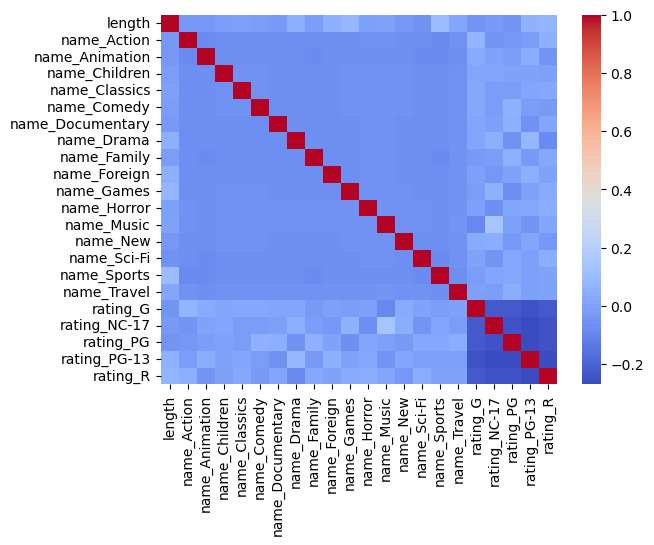

In [56]:
#visually presenting correlation matrix
corr_matrix=data01.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### X/Y Split

In [ ]:
def data_to_analyse(x):
    if (x['rental_month']<target_month) & (x['rental_year'] <=target_year):
        return 0
    else:
        return 1

In [ ]:
y = data['target']
X = data01.drop('target', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)